Xây dựng mạng ANN phân lớp fashion. Khai báo các gói numpy, mnist, keras
https://victorzhou.com/blog/keras-neural-network-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
#from keras.datasets import mnist
from tensorflow.keras.datasets.cifar10 import load_data


Lấy dữ liệu từ mnist. Có 2 tập train và test


In [2]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [3]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Có 60000 ảnh train và 10000 ảnh để test

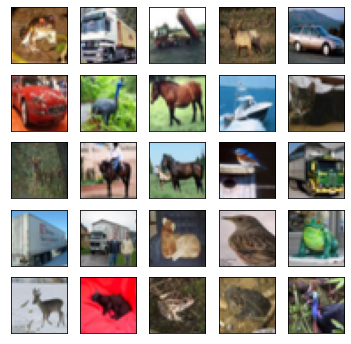

In [4]:
class_names = ['Máy bay', 'Xe hoi', 'Chim', 'Mèo', 'Hươu',
               'Chó', 'Ếch', 'Ngựa', 'Tàu thủy', 'Xe tải']
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

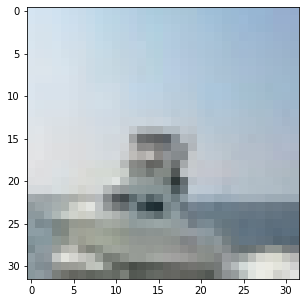

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[100])
plt.show()


In [6]:
train_images = (train_images / 255)
test_images = (test_images / 255)

In [7]:
# Normalize the images.


# Flatten the images.
train_images = train_images.reshape((-1, 3072))
test_images = test_images.reshape((-1, 3072))


Mạng có 1 lớp vào 784 nút, 2 lớp ẩn mỗi lớp 64 nút, 1 lớp ra 10 nút. Các hàm kích hoạt là relu và softmax

In [20]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(3072,)),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                196672    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 213,962
Trainable params: 213,962
Non-tr

In [22]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

Huấn luyện mạng 

In [23]:
history=model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=50,
  batch_size=32,
)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9081 - accuracy: 0.3008
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7321 - accuracy: 0.3717
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6609 - accuracy: 0.4022
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6165 - accuracy: 0.4199
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5845 - accuracy: 0.4332
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5584 - accuracy: 0.4401
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5338 - accuracy: 0.4504
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5138 - accuracy: 0.4549
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5029 - accuracy: 0.4596
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.486

In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


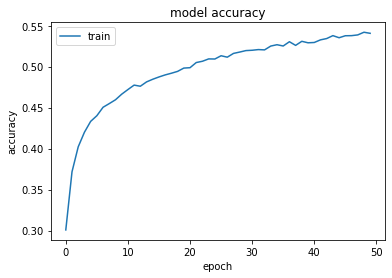

In [26]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

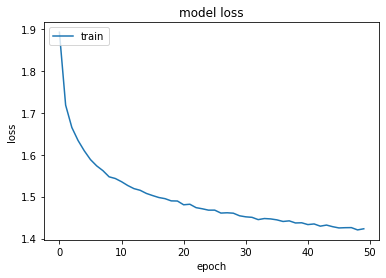

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 1s 3ms/step - loss: 1.5258 - accuracy: 0.4704


[1.5257635116577148, 0.47040000557899475]

In [16]:
import keras
model.save('model.h5')

In [17]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:25])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:25]) 

1/1 [==============================] - 0s 95ms/step
[8 8 8 0 4 6 3 6 5 1 0 9 3 7 9 5 5 3 8 6 4 2 0 9 2]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]
 [7]
 [0]
 [4]
 [9]
 [5]]


Thử lấy model đã lưu trong model.h5 - không phải đào tạo lại

In [18]:
# Load the model's saved weights.
#model1= model.load_weights('model.h5')

model1= keras.models.load_model('model.h5')


In [19]:
#@tf.autograph.experimental.do_not_convert
# Predict on the first 5 test images.
predictions = model1.predict(test_images[:50])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:50]) # [7, 2, 1, 0, 4]

2/2 [==============================] - 0s 3ms/step
[8 8 8 0 4 6 3 6 5 1 0 9 3 7 9 5 5 3 8 6 4 2 0 9 2 6 6 0 1 6 6 4 6 5 9 1 6
 9 9 5 7 6 3 6 0 9 6 8 4 6]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]
 [7]
 [0]
 [4]
 [9]
 [5]
 [2]
 [4]
 [0]
 [9]
 [6]
 [6]
 [5]
 [4]
 [5]
 [9]
 [2]
 [4]
 [1]
 [9]
 [5]
 [4]
 [6]
 [5]
 [6]
 [0]
 [9]
 [3]
 [9]
 [7]
 [6]]
